In [13]:
from pathlib import Path
import pandas as pd
import pint
import pint_pandas
import matplotlib.pyplot as plt
import numpy as np
import sys

In [14]:
sys.path.append(str(Path.cwd().parent))

In [15]:
from src.utils import load_pint_data
from src.utils.pint_units import PREFERRED_UNITS

In [16]:
ROOT = Path.cwd().parent
VERSION = "01"
DATA_TYPE = "Training"
print(ROOT)

/Users/thomassimader/Documents/NIRB


In [18]:
df_path = ROOT  / "data" / VERSION/ f"{DATA_TYPE.lower()}_samples.csv"
assert df_path.exists()
df_training = load_pint_data(df_path)
df_training.dtypes

host_k    pint[meter ** 2][float64]
T_h           pint[kelvin][float64]
dtype: object

In [19]:
df_training

,host_k,T_h
0,5.069907082747025e-18,419.7999999999999
1,1.4288939585111065e-17,485.5
2,2.8510182675038976e-17,421.6
3,7.673614893618217e-18,487.2999999999999
4,3.3496543915782656e-18,473.7999999999999
...,...,...
295,1.0115794542598962e-17,457.6
296,2.426610095082414e-16,441.4
297,6.839116472814307e-16,460.2999999999999
298,7.498942093324558e-17,409.0


In [6]:
for col in df_training.columns:
    if df_training[col].pint.dimensionality in PREFERRED_UNITS:
        unit = PREFERRED_UNITS[df_training[col].pint.dimensionality]
        df_training[col] = df_training[col].pint.to(unit)
units = df_training.dtypes
col_names = [f"{name} ({unit.units:~P})" for name, unit in zip(df_training.columns, units)]
df_training.columns = col_names

In [7]:
df_training

,host_k (m²),T_h (°C)
0,5.069907082747025e-18,146.64999999999992
1,1.4288939585111065e-17,212.35000000000002
2,2.8510182675038976e-17,148.45000000000005
3,7.673614893618217e-18,214.14999999999992
4,3.3496543915782656e-18,200.64999999999992
...,...,...
295,1.0115794542598962e-17,184.45000000000005
296,2.426610095082414e-16,168.25
297,6.839116472814307e-16,187.14999999999992
298,7.498942093324558e-17,135.85000000000002


In [9]:
for column in df_training.columns:  # Loop through the first level of the column multi-index
    df_training[column] = df_training[column].apply(lambda x: x.magnitude)  # Apply unit (adjust 'meter' to fit your case)


In [12]:
df_training.describe()

,host_k (m²),T_h (°C)
count,3.000000e+02,300.000000
mean,1.441590e-16,176.250000
std,2.255610e-16,23.815845
min,1.035142e-18,130.450000
25%,5.623413e-18,156.537500
50%,3.164164e-17,178.150000
75%,1.778279e-16,195.541667
max,9.660509e-16,219.550000


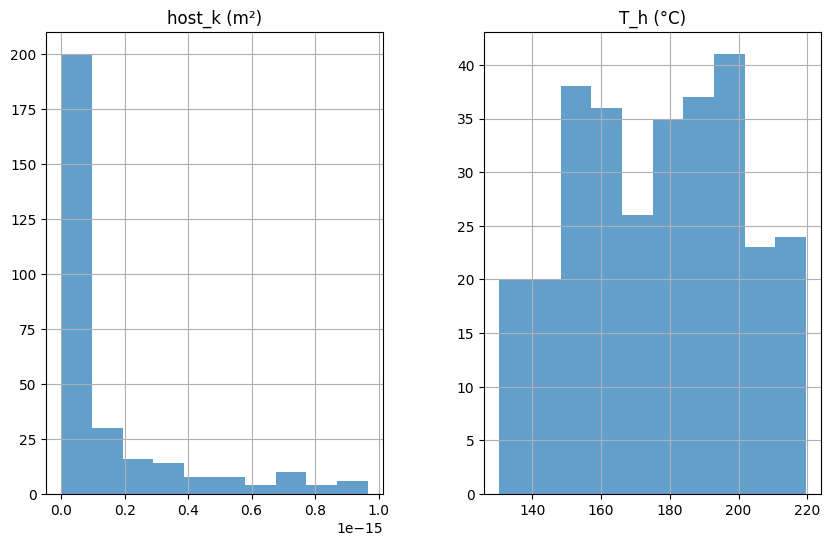

In [10]:
df_training.hist(figsize=(10, 6), alpha=0.7);
plt.savefig(df_path.parent / f"{DATA_TYPE}_histogram.png", dpi=300, bbox_inches='tight')  # You can change the filename and format
plt.show()  # Close the figure if you're done with it


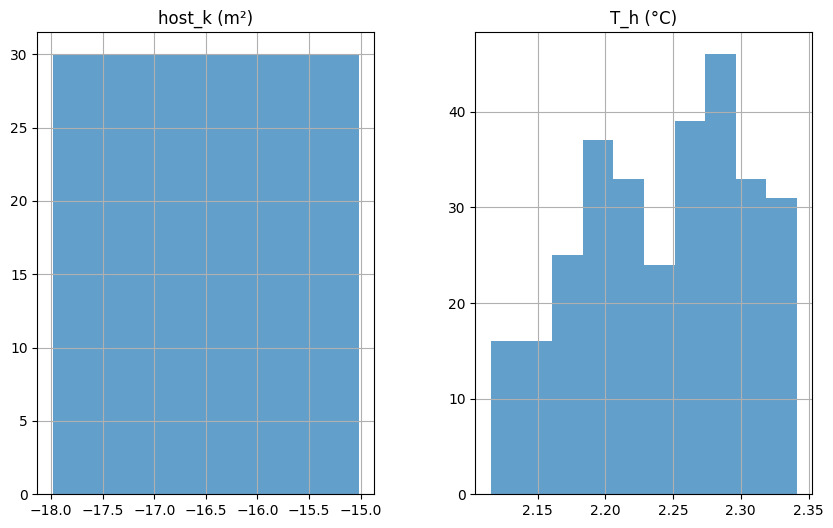

In [11]:
df_training.apply(lambda x : np.log10(x)).hist(figsize=(10, 6), alpha=0.7);
plt.savefig(df_path.parent / f"{DATA_TYPE}_histogram_log.png", dpi=300, bbox_inches='tight')  # You can change the filename and format
plt.show()  # Close the figure if you're done with it